In [1]:
import random

In [3]:
for j in range(10):
    print(random.randint(-5,5))


5
-3
-5
1
-2
1
-4
-5
3
-2


In [2]:
import numpy as np

a = np.array([1,2,3])
print(a)

np.save('probando_save_np.npy', a)

[1 2 3]


In [3]:
b = np.load('probando_save_np.npy')
print(b)

[1 2 3]


In [1]:
c = 4
print('Tengo ' + str(c) + ' perros')

Tengo 4 perros


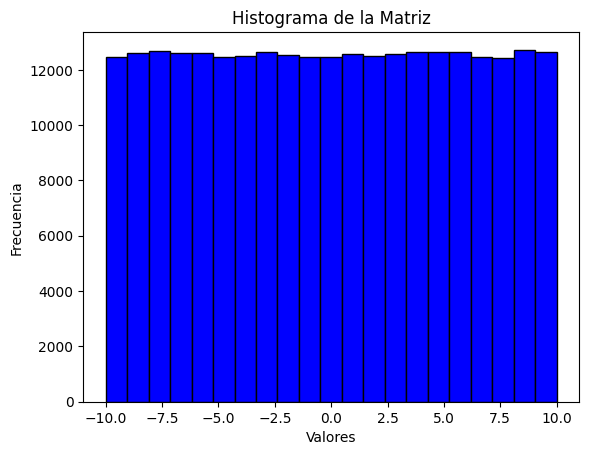

Valores en el histograma: [12478 12593 12689 12591 12607 12455 12517 12640 12525 12471 12462 12561
 12499 12572 12654 12627 12627 12448 12422 12727 12633]
Bordes de los bins: [-10.          -9.04761905  -8.0952381   -7.14285714  -6.19047619
  -5.23809524  -4.28571429  -3.33333333  -2.38095238  -1.42857143
  -0.47619048   0.47619048   1.42857143   2.38095238   3.33333333
   4.28571429   5.23809524   6.19047619   7.14285714   8.0952381
   9.04761905  10.        ]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def cargar_y_calcular_histograma(archivo_npy):
    try:
        # Cargar la matriz desde el archivo .npy
        matriz = np.load(archivo_npy)

        # Calcular el histograma de los valores en la matriz
        histograma = np.histogram(matriz, bins=21)  # Puedes ajustar el número de bins según tus necesidades

        # Desempaquetar los valores del histograma
        valores_histograma, bins = histograma

        # Trazar el histograma
        plt.hist(matriz.flatten(), bins=21, color='blue', edgecolor='black')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de la Matriz')
        plt.show()

        return valores_histograma, bins, matriz

    except FileNotFoundError:
        print(f"El archivo {archivo_npy} no se encontró.")
        return None

# Ejemplo de uso
archivo_npy = 'uniform_10_pixels_variation.npy'  # Reemplaza con el nombre de tu archivo .npy
histograma_valores, bins, matriz = cargar_y_calcular_histograma(archivo_npy)

if histograma_valores is not None:
    print("Valores en el histograma:", histograma_valores)
    print("Bordes de los bins:", bins)


In [11]:
print(np.max(matriz))
print(np.min(matriz))
print(matriz.shape[0]*matriz.shape[1] - np.count_nonzero(matriz))

10
-10
12462


In [28]:
import pickle
with open('/nfs/bartesaghilab2/ds672/empiar10076/2023_10_30_output_tutorial_downsampling_256_z_8/analyze.49/umap.pkl', 'rb') as archivo:
    umap_emb = pickle.load(archivo)

print(objeto_cargado)

[[-1.9537752   6.240617  ]
 [ 2.8473802   6.736703  ]
 [-0.29597488 10.03585   ]
 ...
 [ 7.561227    1.982359  ]
 [11.278448    1.7863995 ]
 [ 8.471018    0.23968494]]


In [29]:
import cryodrgn
from cryodrgn import analysis, utils, config

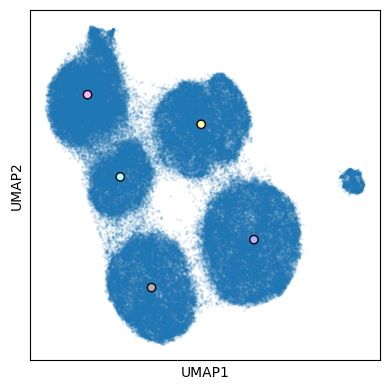

In [42]:
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], alpha=0.1, s=1, rasterized=True)
plt.scatter(centers[:,0], centers[:,1], c=colors,edgecolor='black')
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()

In [34]:
# from typing import Optional, Union, Tuple, List

# def cluster_kmeans(
#     z: np.ndarray, K: int, on_data: bool = True, reorder: bool = True
# ) -> Tuple[np.ndarray, np.ndarray]:
#     """
#     Cluster z by K means clustering
#     Returns cluster labels, cluster centers
#     If reorder=True, reorders clusters according to agglomerative clustering of cluster centers
#     """
#     kmeans = KMeans(n_clusters=K, random_state=0, max_iter=10)
#     labels = kmeans.fit_predict(z)
#     centers = kmeans.cluster_centers_

#     centers_ind = None
#     if on_data:
#         centers, centers_ind = get_nearest_point(z, centers)

#     if reorder:
#         g = sns.clustermap(centers)
#         reordered = g.dendrogram_row.reordered_ind
#         centers = centers[reordered]
#         if centers_ind is not None:
#             centers_ind = centers_ind[reordered]
#         tmp = {k: i for i, k in enumerate(reordered)}
#         labels = np.array([tmp[k] for k in labels])
#     return labels, centers

# def get_nearest_point(
#     data: np.ndarray, query: np.ndarray
# ) -> Tuple[npt.NDArray[np.float32], np.ndarray]:
#     """
#     Find closest point in @data to @query
#     Return datapoint, index
#     """
#     ind = cdist(query, data).argmin(axis=1)
#     return data[ind], ind

# def save_pkl(data, out_pkl: str, mode: str = "wb") -> None:
#     if mode == "wb" and os.path.exists(out_pkl):
#         logger.warning(f"Warning: {out_pkl} already exists. Overwriting.")
#     with open(out_pkl, mode) as f:
#         pickle.dump(data, f)  # type: ignore

In [41]:
import os
import numpy as np

outdir = '/hpc/home/ds672/master/aux_functions/'
# kmeans clustering
# logger.info("K-means clustering...")
K = 5
kmeans_labels, centers = analysis.cluster_kmeans(umap_emb, K, reorder=False)
#centers, centers_ind = analysis.get_nearest_point(umap_emb, centers)
if not os.path.exists(f"{outdir}/kmeans{K}_umap"):
    os.mkdir(f"{outdir}/kmeans{K}_umap")
utils.save_pkl(kmeans_labels, f"{outdir}/kmeans{K}_umap/labels_umap.pkl")
np.savetxt(f"{outdir}/kmeans{K}_umap/centers.txt", centers)
np.savetxt(f"{outdir}/kmeans{K}_umap/centers_ind.txt", centers_ind, fmt="%d")
# logger.info("Generating volumes...")
# vg.gen_volumes(f"{outdir}/kmeans{K}", centers)

/hpc/home/ds672/miniconda3/envs/cryodrgn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(WARNING) (utils.py) (03-Nov-23 14:50:33) Warning: /hpc/home/ds672/master/aux_functions//kmeans5_umap/labels_umap.pkl already exists. Overwriting.


ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 2.

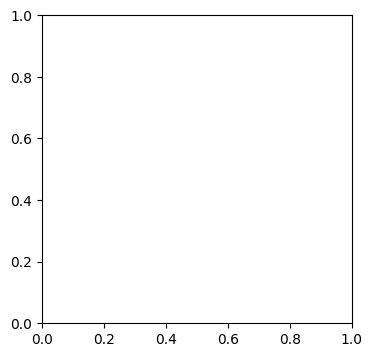

In [38]:
import seaborn as sns

WORKDIR = '/nfs/bartesaghilab2/ds672/empiar10076/2023_10_30_output_tutorial_downsampling_256_z_8' 
EPOCH = 49 # CHANGE ME
colors = analysis._get_chimerax_colors(K)

#kmeans_ind = np.loadtxt(f'{WORKDIR}/analyze.{EPOCH}/kmeans{K}/centers_ind.txt', dtype=int)
kmeans_ind = centers_ind
f, ax = plt.subplots(figsize=(4,4))
#plt.scatter(umap_emb[:,0], umap_emb[:,1], alpha=.05, s=1,rasterized=True)
#plt.scatter(umap_emb[kmeans_ind,0], umap_emb[kmeans_ind,1], c=colors,edgecolor='black')
plt.scatter(centers[0], centers[1], c=colors,edgecolor='black')
labels = np.arange(len(kmeans_ind))
centers = umap_emb[kmeans_ind]
for i in labels:
    ax.annotate(str(i), centers[i, 0:2] + np.array([0.1, 0.1]))
plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

In [47]:
a = np.array([0,1,3,4,5])
b = [0,1,3,4,5]
cc = np.array([12,32,43,54,65,67,7,88,6,4,3,5,6,36,6])
print(cc[a])
print(b.shape)

[12 32 54 65 67]


AttributeError: 'list' object has no attribute 'shape'

In [50]:
import random

dim_b = 20
num_pixels = 20

a = [random.randint(-num_pixels, num_pixels) for _ in range(dim_b)]

print(a)

[5, 7, -19, -4, 10, 19, 14, 5, 11, 2, -12, -7, 10, -20, 3, -4, -20, 0, -16, 4]


In [52]:
def generar_lista(N, sublistas):
    # Inicializar la lista final con listas vacías
    lista_final = [[] for _ in range(N)]

    # Recorrer las sublistas
    for posiciones, valores in sublistas:
        # Asignar los valores a las posiciones correspondientes en la lista final
        for i, valor in zip(posiciones, valores):
            lista_final[i].append(valor)

    return lista_final

# Ejemplo de uso
N = 5
sublistas = [([0, 1, 2, 3], [1, 2, 3, 13]), ([1, 3, 4], [4, 5, 6]), ([0, 2, 3], [7, 8, 9])]

resultado = generar_lista(N, sublistas)
print(resultado)

[[1, 7], [2, 4], [3, 8], [13, 5, 9], [6]]


In [54]:
posiciones_listas = [[0, 1], [1, 3, 4], [0, 2, 3]]
valores_listas = [[1, 2], [4, 5, 6], [7, 8, 9]]

sublistas = [(posiciones, valores) for posiciones, valores in zip(posiciones_listas, valores_listas)]

print(sublistas)


[([0, 1], [1, 2]), ([1, 3, 4], [4, 5, 6]), ([0, 2, 3], [7, 8, 9])]


In [57]:
def obtener_maximos_por_lista(lista_de_listas):
    # Usa la función map con max para obtener el máximo en cada lista
    maximos = list(map(max, lista_de_listas))
    return maximos

# Ejemplo de uso
lista_de_listas = [[1, 5, 3], [8, 2, 4], [6, 7, 9]]
maximos = obtener_maximos_por_lista(lista_de_listas)

print(maximos)

[5, 8, 9]


In [58]:
def tiene_elementos_vacios(lista_de_listas):
    for sublista in lista_de_listas:
        if not sublista:
            return True  # Hay al menos una lista vacía

        for elemento in sublista:
            if not elemento:
                return True  # Hay al menos un elemento vacío

    return False  # No hay listas ni elementos vacíos

# Ejemplo de uso
mi_lista_de_listas = [[1, 2, 3], [], ['a', '', 'c'], [4, 5, 6]]

if tiene_elementos_vacios(mi_lista_de_listas):
    print("La lista de listas tiene elementos vacíos.")
else:
    print("La lista de listas no tiene elementos vacíos.")

La lista de listas tiene elementos vacíos.


In [62]:
def encontrar_listas_vacias(lista_de_listas):
    posiciones_listas_vacias = []

    for i, sublista in enumerate(lista_de_listas):
        if not sublista:
            posiciones_listas_vacias.append(i)

    return posiciones_listas_vacias

# Ejemplo de uso
mi_lista_de_listas = [[1, 2, 3], [], ['a', 'c'], [4, 5, 6], []]

posiciones_listas_vacias = encontrar_listas_vacias(mi_lista_de_listas)

if posiciones_listas_vacias:
    print("Listas vacías encontradas en las posiciones:", posiciones_listas_vacias)
else:
    print("No se encontraron listas vacías.")


Listas vacías encontradas en las posiciones: [1, 4]


In [4]:
import numpy as np

a = [1,2,3,4]
b = 3
c = 9
for el in a:
    if el == b:
        print(a.index(el))
#print(np.where(b == a))

2


In [6]:
for j in range(3):
    for i in range(10):
        print(i)
        if i == 3:
            break

0
1
2
3
0
1
2
3
0
1
2
3


In [12]:
a = np.array([2,4,6,8])
#b = a.index(2)
c  = 6
#c = a.index(7)

if c in a:
    print(f"El elemento {c} está en la lista")
else:
    print(f"El elemento {c} no está en la lista")

print(b)
print(c)

El elemento 6 está en la lista
0
6


In [2]:
a = None
b = [1,2]
if not a:
    print('not a')
if a:
    print('a')
if not b:
    print('not b')
if b:
    print('b')

not a
b


In [4]:
def leer_archivo_y_generar_lista(nombre_archivo):
    try:
        with open(nombre_archivo, 'r') as archivo:
            # Lee todas las líneas del archivo
            lineas = archivo.readlines()

            # Convierte cada línea a un entero y agrégalo a la lista
            lista_enteros = [int(linea.strip()) for linea in lineas]

        return lista_enteros

    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no fue encontrado.")
        return None
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None

# Ejemplo de uso
nombre_archivo = '/nfs/bartesaghilab2/ds672/empiar10076/2023_11_06_output_tutorial_downsampling_256_z_8_20pixels_translation/analyze.49/kmeans5/centers_ind.txt'  # Reemplaza 'archivo.txt' con el nombre de tu archivo
resultado = leer_archivo_y_generar_lista(nombre_archivo)

if resultado is not None:
    print(f"Lista de enteros generada: {resultado}")


Lista de enteros generada: [67938, 127155, 131300, 113422, 78060]


In [1]:
idxs = [1, 2, 3]
corrs = ['a', 'b', 'c']
sublist = [(idx_tot, corr_tot) for idx_tot, corr_tot in zip(idxs, corrs)]
print(sublist)  # Output: [(1, 'a'), (2, 'b'), (3, 'c')]


[(1, 'a'), (2, 'b'), (3, 'c')]


In [2]:
N = 3
final_list = [[] for _ in range(N)]
print(final_list)

[[], [], []]


In [6]:
import numpy as np

a = np.array([1,5,7,3,1])
b = np.array([3,4,2,8,9])
print(np.argmax(a))
print(b[np.argmax(a)])

2
2


In [1]:
from poses_functions import *

input_cs_path = '/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/filtered_particles/J24_003_particles.cs'
output_pkl_path = '/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/filtered_particles/J24_003_particles.pkl'
extract_info_from_cs(input_cs_path)
_, _, _, filtered_indexes = process_and_save_data(input_cs_path, output_pkl_path)

0 uid 17627880363220974845
1 blob/path b'J20/imported/017627880363220974845_L17Combine_weight_local.mrc'
2 blob/idx 0
3 blob/shape [320 320]
4 blob/psize_A 1.31
5 blob/sign 1.0
6 blob/import_sig 5998482269839751963
7 ctf/type b'imported'
8 ctf/exp_group_id 6
9 ctf/accel_kv 300.0
10 ctf/cs_mm 2.7
11 ctf/amp_contrast 0.07
12 ctf/df1_A 15301.1
13 ctf/df2_A 14916.4
14 ctf/df_angle_rad 0.092153385
15 ctf/phase_shift_rad 0.0
16 ctf/scale 1.0
17 ctf/scale_const 0.0
18 ctf/shift_A [0. 0.]
19 ctf/tilt_A [0. 0.]
20 ctf/trefoil_A [0. 0.]
21 ctf/tetra_A [0. 0. 0. 0.]
22 ctf/anisomag [0. 0. 0. 0.]
23 ctf/bfactor 0.0
24 alignments3D/split 0
25 alignments3D/shift [3.25 9.55]
26 alignments3D/pose [-1.8548019  -0.09466853  1.5532651 ]
27 alignments3D/psize_A 1.31
28 alignments3D/error 24644.475
29 alignments3D/error_min 0.0
30 alignments3D/resid_pow 0.0
31 alignments3D/slice_pow 144.83609
32 alignments3D/image_pow 24863.367
33 alignments3D/cross_cor 363.72852
34 alignments3D/alpha 1.0
35 alignments3D/a

In [4]:
print(filtered_indexes)
idx_pkl_file = '/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/filtered_particles/indexes.pkl'
with open(idx_pkl_file, 'wb') as file:
    pickle.dump(filtered_indexes, file)
    
print(len(filtered_indexes))

[     0      1      3 ... 131896 131897 131898]
119147


In [16]:
import os
print(os.getcwd())  # Muestra el directorio actual

if os.path.exists(labels_path):
    print("El directorio o archivo existe")
else:
    print("El directorio no existe")


/nfs/bartesaghilab2/ds672/master/aux_functions
El directorio o archivo existe


In [7]:
import pickle
import numpy as np
from poses_functions import *

#Pruebo que poses_processing funcione con all_particles
labels_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/labels.pkl'
particles_per_label_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label'
poses_processed_precryodrgn_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/processed_poses_2/poses_without_cryodrgn_processing.pkl'
poses_processed_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/processed_poses/poses_processed.pkl'

#Labels
try:
    with open(labels_path, 'rb') as file:
        labels = pickle.load(file)
except EOFError:
    print(f"Error: El archivo labels_path está vacío o corrupto.")

print(f'{labels=}')
print(f'{len(labels)=}\n')

#Particles per label
particles_per_label = []
if not os.path.isdir(particles_per_label_path):
    print(f"Error: La carpeta '{particles_per_label_path}' no existe.\n")
else:
    # Recorre todos los archivos en la carpeta
    for filename in sorted(os.listdir(particles_per_label_path)):
        file_path = os.path.join(particles_per_label_path, filename)
        print(f'{file_path=}')
        # Verifica que sea un archivo (y no un subdirectorio)
        try:
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                particles_per_label.append(data)
                print(f"✅ Archivo '{filename}' cargado correctamente.\n")
        except EOFError:
            print(f"⚠️ Error: El archivo '{filename}' está vacío o corrupto.\n")
        except pickle.UnpicklingError:
            print(f"❌ Error: No se pudo deserializar '{filename}', el formato no es válido.\n")
        except Exception as e:
            print(f"⚠️ Error desconocido en '{filename}': {e}")
    particles_per_label_length = sum(len(particles) for particles in particles_per_label)
    print(f'{particles_per_label_length=}\n')

#Poses processed
try:
    with open(poses_processed_precryodrgn_path, 'rb') as file:
        poses_processed_precryodrgn = pickle.load(file)
except EOFError:
    print(f"Error: El archivo poses_processed_precryodrgn_path está vacío o corrupto.\n")

print(f'{len(poses_processed_precryodrgn[0])=}\n')

labels=array([0, 1, 2, ..., 4, 4, 4])
len(labels)=119147

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_0.pkl'
✅ Archivo 'particles_class_0.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_1.pkl'
✅ Archivo 'particles_class_1.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_2.pkl'
✅ Archivo 'particles_class_2.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_3.pkl'
✅ Archivo 'particles_class_3.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experimen

In [8]:
poses_cs_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/refinement_per_label'
files = sorted(os.listdir(poses_cs_path))
print(files)
files = [os.path.join(poses_cs_path, file) for file in files]
rots, trans = [], []
for file in files:
    rot, tran, _, _ = extract_info_from_cs(file)
    rots.append(rot), trans.append(tran)

['J35_004_particles.cs', 'J36_004_particles.cs', 'J37_005_particles.cs', 'J38_004_particles.cs', 'J39_003_particles.cs']
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting translations from alignments3D/shift
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting cross_correlations from alignments3D/cross_cor
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting indexs from blob/idx
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting translations from alignments3D/shift
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting cross_correlations from alignments3D/cross_cor
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting indexs from blob/idx
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (2

In [15]:
print(labels[0:10])
print(f'Partícula 1')
print(rots[0][0])
print(trans[0][0])
print(poses_processed_precryodrgn[0][0])
print(poses_processed_precryodrgn[1][0])
print()
print(f'Partícula 2')
print(rots[1][0])
print(poses_processed_precryodrgn[0][1])
print(trans[1][0])
print(poses_processed_precryodrgn[1][1])
print()
print(f'Partícula 3')
print(rots[2][0])
print(poses_processed_precryodrgn[0][2])
print(trans[2][0])
print(poses_processed_precryodrgn[1][2])
print()
print(f'Partícula 4')
print(rots[0][1])
print(poses_processed_precryodrgn[0][3])
print(trans[0][1])
print(poses_processed_precryodrgn[1][3])
print()
print(f'Partícula 5')
print(rots[3][0])
print(poses_processed_precryodrgn[0][4])
print(trans[3][0])
print(poses_processed_precryodrgn[1][4])

[0 1 2 0 3 0 2 3 3 2]
Partícula 1
[-0.8029294   1.3148407  -0.07363108]
[ 5.15 11.25]
[-0.8029294   1.3148407  -0.07363108]
[ 5.15 11.25]

Partícula 2
[-0.2769931  1.5743026  1.9599892]
[-0.2769931  1.5743026  1.9599892]
[-19.85   4.75]
[-19.85   4.75]

Partícula 3
[2.3667133  0.02454369 1.174591  ]
[2.3667133  0.02454369 1.174591  ]
[-17.85  -8.25]
[-17.85  -8.25]

Partícula 4
[1.1956284 0.6135923 1.7636396]
[1.1956284 0.6135923 1.7636396]
[ 16.85 -15.55]
[ 16.85 -15.55]

Partícula 5
[0.68371713 1.2096534  1.5182027 ]
[0.68371713 1.2096534  1.5182027 ]
[24.15 -6.05]
[24.15 -6.05]


In [2]:
import pickle

poses_processed_precryodrgn_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/processed_poses_2/poses_without_cryodrgn_processing.pkl'

try:
    with open(poses_processed_precryodrgn_path, 'rb') as file:
        poses_processed_precryodrgn = pickle.load(file)
except EOFError:
    print(f"Error: El archivo poses_processed_precryodrgn_path está vacío o corrupto.\n")

In [4]:
print(len(poses_processed_precryodrgn[0]))

119147


In [9]:
my_labels_ribosembly_path = '/nfs/bartesaghilab2/ds672/cryobench/Ribosembly/2025_02_25_z8/analyze.49/kmeans16_umap/labels.pkl'
with open(my_labels_ribosembly_path, 'rb') as file:
        my_labels_ribosembly = pickle.load(file)
print(my_labels[11000:11180])
print(f'{len(my_labels)=}')

[ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8 11  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8 11  8  8  8  8  8  8  8  8
  8  8  8  9  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  9  8  8  8  8  8  8  8  8  8  8]
len(my_labels)=335240


In [10]:
gt_labels_ribosembly_path = '/nfs/bartesaghilab2/ds672/cryobench/Ribosembly/gt_latents.pkl'
with open(gt_labels_ribosembly_path, 'rb') as file:
        gt_labels_ribosembly = pickle.load(file)
print(gt_labels_ribosembly[1000:1180])
print(f'{len(gt_labels_ribosembly)=}')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
len(gt_labels_ribosembly)=335240


In [12]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score


ari_ribosembly = adjusted_rand_score(gt_labels_ribosembly, my_labels_ribosembly)
ami_ribosembly = adjusted_mutual_info_score(gt_labels_ribosembly, my_labels_ribosembly)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Adjusted Mutual Information (AMI): {ami_ribosembly}')

Adjusted Rand Index (ARI): 0.8825507440964118
Adjusted Mutual Information (AMI): 0.9391348442800326


In [15]:
print(gt_labels_ribosembly[-10:])

[15 15 15 15 15 15 15 15 15 15]


In [2]:
import pickle

maps_empiar10180_path = '/nfs/bartesaghilab2/ds672/empiar10180/experiments/2025_02_26_z8_ds256/analyze.49/umap.pkl'
with open(umaps_empiar10180_path, 'rb') as file:
        umaps_empiar10180 = pickle.load(file)
print(umaps_empiar10180[0:10])

[[7.0841174  9.649928  ]
 [7.6515346  9.504668  ]
 [6.933299   9.289288  ]
 [9.7452545  7.6083584 ]
 [8.573069   9.187077  ]
 [4.622047   7.9989734 ]
 [6.383285   9.614525  ]
 [0.59207255 8.772302  ]
 [3.9494524  7.139415  ]
 [2.5364032  8.541464  ]]


In [4]:
from poses_functions import *

rot_cs, trans_cs, _, _ = extract_info_from_cs('../../empiar10076/inputs/initial_hidden_variables/all_particles/J3_003_particles.cs')
print(rot)

(INFO) (poses_functions.py) (11-Apr-25 11:04:02) Extracting rotations from alignments3D/pose


(INFO) (poses_functions.py) (11-Apr-25 11:04:03) Extracting translations from alignments3D/shift
(INFO) (poses_functions.py) (11-Apr-25 11:04:03) Extracting cross_correlations from alignments3D/cross_cor
(INFO) (poses_functions.py) (11-Apr-25 11:04:03) Extracting indexs from blob/idx
[[ 0.8099418  -1.3078282  -0.07363108]
 [-0.08765604  3.2572987   0.6416423 ]
 [-2.3737257  -0.06661859  1.2026409 ]
 ...
 [ 0.05960611  0.89409167 -0.73280454]
 [ 0.19985579  1.2727658   1.0553788 ]
 [-0.29803056 -1.4831402   0.7889044 ]]


In [17]:
import numpy as np
import pickle

def par_to_pkl(par_path): #, output_pkl_path):
    rotations = []
    translations = []

    with open(par_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('C'):
                continue  # Ignorar comentarios y líneas vacías

            parts = line.split()
            if len(parts) < 6:
                continue  # Línea inválida

            # Extraer PSI, THETA, PHI (índices 1, 2, 3)
            psi = float(parts[1])
            theta = float(parts[2])
            phi = float(parts[3])
            # Extraer SHX, SHY (índices 4, 5)
            shx = float(parts[4])
            shy = float(parts[5])

            rotations.append([psi, theta, phi])
            translations.append([shx, shy])

    rotations = np.array(rotations)
    translations = np.array(translations)

    return rotations, translations
    # # Guardar como tupla de arrays
    # with open(output_pkl_path, 'wb') as f:
    #     pickle.dump((rotations, translations), f)

    # print(f"Guardado {len(rotations)} poses en: {output_pkl_path}")

# Ejemplo de uso:
# par_to_pkl("tu_archivo.par", "poses.pkl")


# Ejemplo de uso
rot_par_first, trans_par_first = par_to_pkl("../../nextpyp/empiar10076/output_parameter_file_first.par") #, "../poses_del_par_N_noproj.pkl")
rot_par_N, trans_par_N = par_to_pkl("../../nextpyp/empiar10076/output_parameter_file_N.par") #, "../poses_del_par_N_noproj.pkl")
rot_par_N_noproj, trans_par_N_noproj = par_to_pkl("../../nextpyp/empiar10076/output_parameter_file_N_noproj.par") #, "../poses_del_par_N_noproj.pkl")

In [51]:
print('Rotaciones de .cs: \n',rot_cs)
print('Tipo de dato: ',type(rot_cs[0][0]))
print('Máximo: ', np.max(rot_cs))
print('Mínimo: ', np.min(rot_cs))
print('Valor medio:', np.mean(rot_cs, axis=0))
print('\n')

print('Rotaciones de .par (first): \n', rot_par_first)
print('Tipo de dato: ', type(rot_par_first[0][0]))
print('Máximo: ', np.max(rot_par_first))
print('Mínimo: ', np.min(rot_par_first))
print('Valor medio: ', np.mean(rot_par_first, axis=0))
print()

# print(rot_par_N)
# print(type(rot_par_N[0][0]))
# print(np.max(rot_par_N))
# print(np.min(rot_par_N))

# print(rot_par_N_noproj)
# print(type(rot_par_N_noproj[0][0]))
# print(np.max(rot_par_N_noproj))
# print(np.min(rot_par_N_noproj))

Rotaciones de .cs: 
 [[ 0.8099418  -1.3078282  -0.07363108]
 [-0.08765604  3.2572987   0.6416423 ]
 [-2.3737257  -0.06661859  1.2026409 ]
 ...
 [ 0.05960611  0.89409167 -0.73280454]
 [ 0.19985579  1.2727658   1.0553788 ]
 [-0.29803056 -1.4831402   0.7889044 ]]
Tipo de dato:  <class 'numpy.float32'>
Máximo:  3.362486
Mínimo:  -3.362486
Valor medio: [-0.05171296 -0.07017922 -0.06584986]


Rotaciones de .par (first): 
 [[ 157.38   16.6  -103.9 ]
 [ 113.97   94.01 -145.77]
 [-141.58   95.59 -153.94]
 ...
 [  73.98  131.01 -149.83]
 [ 101.08  177.07  148.52]
 [ 188.73   31.4   -44.62]]
Tipo de dato:  <class 'numpy.float64'>
Máximo:  485.81
Mínimo:  -268.67
Valor medio:  [ 93.52875063  85.11164194 -14.70390162]



In [ ]:
print('Traslaciones de .cs: \n',trans_cs)
print('Tipo de dato: ',type(trans_cs[0][0]))
print('Máximo: ', np.max(trans_cs))
print('Mínimo: ', np.min(trans_cs))
print('Valor medio:', np.mean(trans_cs, axis=0))
print('\n')

print('Traslaciones de .par (first): \n',trans_par_first)
print('Tipo de dato: ', type(trans_par_first[0][0]))
print('Máximo: ', np.max(trans_par_first))
print('Mínimo: ', np.min(trans_par_first))
print('Valor medio: ', np.mean(trans_par_first, axis=0))
print()

# print('Traslaciones de .par (first): \n', trans_par_N)
# print('Tipo de dato: ', type(trans_par_N[0][0]))
# print('Máximo',np.max(trans_par_N))
# print(np.min(trans_par_N))
# print("Promedio trans_par_N:", np.mean(trans_par_N, axis=0))
# print()

# print(trans_par_N_noproj)
# print(type(trans_par_N_noproj[0][0]))
# print(np.max(trans_par_N_noproj))
# print(np.min(trans_par_N_noproj))
# print("Promedio trans_par_N_noproj:", np.mean(trans_par_N_noproj, axis=0))


Traslaciones de .cs: 
 [[  2.75   9.65]
 [-19.55   8.85]
 [-15.05  -7.75]
 ...
 [-31.25   0.75]
 [ 12.75  -0.15]
 [  1.55 -13.55]]
Tipo de dato:  <class 'numpy.float32'>
Máximo:  35.15
Mínimo:  -35.15
Valor medio: [-3.1121647 -3.590329 ]


[[  5.95  -8.49]
 [ 19.64   5.62]
 [ 25.19   0.59]
 ...
 [ 38.97  -1.79]
 [-12.72   2.16]
 [  2.92  11.42]]
Tipo de dato:  <class 'numpy.float64'>
Máximo:  110.35
Mínimo:  -255.23
Valor medio:  [1.95102055 2.61132836]



In [33]:
import numpy as np

def match_poses_scales(rotations_A, rotations_B):
    """
    Escala los vectores de rotación o traslación de B para que sus componentes tengan
    el mismo rango que los de A.
    
    Parámetros:
    - rotations_A: np.ndarray de shape (N, x) → conjunto de referencia
    - rotations_B: np.ndarray de shape (N, x) → conjunto a escalar

    Devuelve:
    - rotations_B_scaled: np.ndarray de shape (N, x)
    """
    min_A = rotations_A.min(axis=0)
    max_A = rotations_A.max(axis=0)
    min_B = rotations_B.min(axis=0)
    max_B = rotations_B.max(axis=0)

    # Evitar división por cero si hay componentes constantes
    scale = (max_A - min_A) / (max_B - min_B + 1e-8)
    offset = min_A - min_B * scale

    rotations_B_scaled = rotations_B * scale + offset
    return rotations_B_scaled


In [50]:
# Ejemplo de uso

rot_par_first_scaled = match_poses_scales(rot_cs, rot_par_first)
trans_par_first_scaled = match_poses_scales(trans_cs, trans_par_first)

rot_par_N_scaled = match_poses_scales(rot_cs, rot_par_N)
trans_par_N_scaled = match_poses_scales(trans_cs, trans_par_N)

rot_par_N_noproj_scaled = match_poses_scales(rot_cs, rot_par_N_noproj)
trans_par_N_noproj_scaled = match_poses_scales(trans_cs, trans_par_N_noproj)

print(trans_par_first)
print()
print(trans_par_first_scaled)
print()
print(trans_cs)

[[  5.95  -8.49]
 [ 19.64   5.62]
 [ 25.19   0.59]
 ...
 [ 38.97  -1.79]
 [-12.72   2.16]
 [  2.92  11.42]]

[[15.07417594 15.84450719]
 [17.70672433 18.7757514 ]
 [18.77397368 17.73080751]
 ...
 [21.42382882 17.23638077]
 [11.48398759 18.05696296]
 [14.49151548 19.98065689]]

[[  2.75   9.65]
 [-19.55   8.85]
 [-15.05  -7.75]
 ...
 [-31.25   0.75]
 [ 12.75  -0.15]
 [  1.55 -13.55]]


In [41]:
# Guardar como tupla de arrays
output_pkl_path = '../../nextpyp/empiar10076/output_parameter_file_first_scaled.par'
with open(output_pkl_path, 'wb') as f:
    pickle.dump((rot_par_first_scaled, trans_par_first_scaled), f)

print(f"Guardado {len(rot_par_first_scaled)} poses en: {output_pkl_path}")

Guardado 131899 poses en: ../../nextpyp/empiar10076/output_parameter_file_first_scaled.par


In [42]:
poses_for_cryodrgn(rot_par_first_scaled, trans_par_first_scaled, output_path = '../../nextpyp/empiar10076/poses_del_par_first_scaled_4cryodrgn.pkl', D = 320)

(INFO) (poses_functions.py) (11-Apr-25 13:15:03) Transposing rotation matrix
(INFO) (poses_functions.py) (11-Apr-25 13:15:04) (131899, 3, 3)


(array([[[-0.84371025, -0.50993948,  0.1676745 ],
         [ 0.02694889,  0.27172877,  0.96199648],
         [-0.53612197,  0.81616494, -0.21551805]],
 
        [[-0.54633858, -0.8342422 , -0.07452594],
         [ 0.83754738, -0.54359293, -0.05496459],
         [ 0.005342  , -0.09244828,  0.99570316]],
 
        [[-0.01231747, -0.04282854,  0.9990065 ],
         [-0.08778667, -0.99517823, -0.0437468 ],
         [ 0.99606314, -0.08823831,  0.0084983 ]],
 
        ...,
 
        [[-0.77588902, -0.6258106 , -0.07973276],
         [ 0.4208741 , -0.41932143, -0.80438456],
         [ 0.46995873, -0.65767061,  0.58873437]],
 
        [[-0.98699715,  0.05043727, -0.15261945],
         [-0.12381452,  0.36692405,  0.92197435],
         [ 0.10250162,  0.92888257, -0.35590812]],
 
        [[-0.23960628, -0.79979751,  0.55037511],
         [-0.04812787,  0.57597635,  0.81604837],
         [-0.96967651,  0.16904194, -0.1765001 ]]]),
 array([[0.0471068 , 0.04951408],
        [0.05533351, 0.05867422],

In [9]:
def crop_par(archivo_entrada, archivo_salida, n_filas_a_eliminar):
    """
    Lee un archivo .par, elimina las primeras n_filas_a_eliminar filas y guarda el resultado en un nuevo archivo.

    :param archivo_entrada: Ruta al archivo .par original
    :param archivo_salida: Ruta al nuevo archivo .par recortado
    :param n_filas_a_eliminar: Número de filas al principio del archivo que se deben eliminar
    """
    with open(archivo_entrada, 'r') as f_in:
        lineas = f_in.readlines()

    # Filtramos las líneas, preservando comentarios (líneas que comienzan con "C ")
    lineas_filtradas = []
    num_eliminadas = 0
    for linea in lineas:
        if linea.strip().startswith('D'):
            lineas_filtradas.append(linea)  # mantener comentarios
        elif num_eliminadas < n_filas_a_eliminar:
            num_eliminadas += 1  # eliminar líneas de datos
        else:
            lineas_filtradas.append(linea)

    with open(archivo_salida, 'w') as f_out:
        f_out.writelines(lineas_filtradas)


In [11]:
input_par_path = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N.par'
output_par_path = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped.par'
C = 53
crop_par(input_par_path, output_par_path, 53)

In [12]:
def modificar_star(archivo_entrada, archivo_salida):
    """
    Modifica un archivo .star comentando el bloque data_optics '_rlnImageName'
    - Comenta el bloque 'data_optics'
    - Comenta '_rlnImageName'
    """
    with open(archivo_entrada, 'r') as f:
        lineas = f.readlines()

    nueva_lista = []
    en_optics = False
    en_particles = False
    header_modificado = False

    for i, linea in enumerate(lineas):
        linea_strip = linea.strip()

        if linea_strip.startswith("data_optics"):
            en_optics = True
            nueva_lista.append("#" + linea)
            continue

        if en_optics:
            if linea_strip == "data_particles":
                en_optics = False
                en_particles = True
                nueva_lista.append(linea)
                continue
            else:
                nueva_lista.append("#" + linea)
                continue

        if en_particles and not header_modificado:
            if linea_strip.startswith("_rlnImageName"):
                nueva_lista.append("#" + linea)
            else:
                nueva_lista.append(linea)
        else:
            nueva_lista.append(linea)

    with open(archivo_salida, 'w') as f:
        f.writelines(nueva_lista)


In [13]:
input_star_file = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped_pyem.star'
output_star_file = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped_pyem_4parse.star'

modificar_star(input_star_file, output_star_file)